In [1]:
# Load relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [2]:
# Load the data

data = pd.read_csv('smallData.csv')
trainData = data[-150:]
nTrain = len(trainData)
testData = data[:-150]
nTest = len(testData)

In [3]:
xTrain = trainData.iloc[:,1:-2].values
yTrain = trainData.iloc[:,-2].values
xTest = testData.iloc[:,1:-2].values
yTest = testData.iloc[:,-2].values

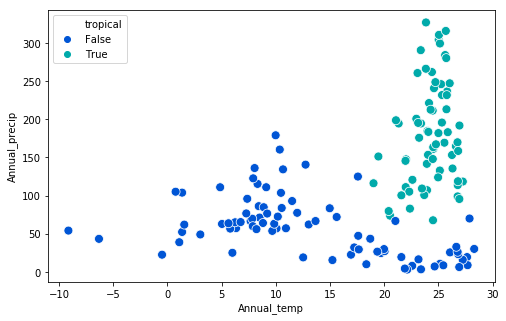

In [4]:
# Plot the training data with and without labels
plt.figure(figsize=(8,5))


sns.scatterplot(x="Annual_temp",y="Annual_precip",hue="tropical",data=trainData,s=80,palette=sns.color_palette("winter", 2))
#sns.scatterplot(x="Annual_temp",y="Annual_precip",data=testData,s=150,marker='d')


In [46]:
# Install TensorFlow 
!pip install -q tensorflow==2.0.0-alpha0 tensorboard

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf

In [6]:
from tensorflow import keras
import tensorboard
import datetime

In [7]:
# Define the MLP model in TensorFlow here
model = keras.Sequential([keras.layers.Dense(4, activation = "sigmoid"),keras.layers.Dense(1, activation = "sigmoid")])

In [8]:
# Options to log the training to investigate the learning
log_dir="logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [9]:
# Compile the model 

model.compile(optimizer='sgd', # Specify the optimizer to be used: Stochastic Gradient Descent
              loss='binary_crossentropy', # Loss function to be optimized BCE = -[ylog(p) + (1-y)log(1-p)]
              metrics=['accuracy'] # Use binary accuracy measure
)
log_dir="logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Fit the training data to the model. Iterations are now epochs!
#model.fit(xTrain, yTrain, epochs=1000, verbose=1, callbacks=[tensorboard_callback])
model.fit(xTrain, yTrain, epochs=1000, verbose=1)

Epoch 1/1000
150/150 [==============================] - 0s 3ms/sample - loss: 0.7919 - acc: 0.4800
Epoch 2/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.7857 - acc: 0.5067
Epoch 3/1000
150/150 [==============================] - 0s 74us/sample - loss: 0.7795 - acc: 0.5067
Epoch 4/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.7740 - acc: 0.5133
Epoch 5/1000
150/150 [==============================] - 0s 87us/sample - loss: 0.7666 - acc: 0.5133
Epoch 6/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.7640 - acc: 0.5133
Epoch 7/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.7577 - acc: 0.5200
Epoch 8/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.7526 - acc: 0.5267
Epoch 9/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.7478 - acc: 0.5267
Epoch 10/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.7348 - acc: 0.5267


In [62]:
# Predict on the test set
test_loss, test_acc = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)

28/28 [==============================] - 0s 9ms/sample - loss: -14.8036 - acc: 0.1786


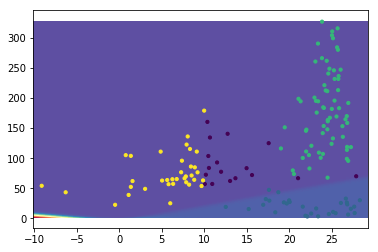

In [66]:
# Plot the decision boundaries
h = 0.1
x_min, x_max = xTrain[:, 0].min() - 1, xTrain[:, 0].max() + 1
y_min, y_max = xTrain[:, 1].min() - 1, xTrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
zInput = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(zInput)


Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z,cmap="Spectral")
plt.scatter(xTrain[:,0],xTrain[:,1],c=yTrain,s=10)
#plt.scatter(xTest[:,0],xTest[:,1],c=yPred,s=10)


In [68]:
%load_ext tensorboard.notebook

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


In [70]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 21352), started 0:01:35 ago. (Use '!kill 21352' to kill it.)

# Multi-class classification

In [16]:

xTrain = trainData.iloc[:,1:-2].values
yTrain = trainData.iloc[:,-1].values
xTest = testData.iloc[:,1:-2].values
yTest = testData.iloc[:,-1].values

# Encode the labels as one hot vectors
nClass = 4
yTrainMC = np.eye(nClass)[yTrain]
yTestMC = np.eye(nClass)[yTest]

In [50]:
### Define the new multi-class model here!
multiClassModel = keras.Sequential([keras.layers.Dense(4, activation = "sigmoid"),keras.layers.Dense(1, activation = "sigmoid")])

In [51]:
multiClassModel.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [54]:
#multiClassModel.fit(xTrain,yTrainMC,epochs=1000,verbose=1,callbacks=[tensorboard_callback])
multiClassModel.fit(xTrain,yTrainMC,epochs=1000)

Epoch 1/1000
150/150 [==============================] - 1s 4ms/sample - loss: 0.6845 - acc: 0.3700
Epoch 2/1000
150/150 [==============================] - 0s 194us/sample - loss: 0.6760 - acc: 0.6733
Epoch 3/1000
150/150 [==============================] - 0s 133us/sample - loss: 0.6680 - acc: 0.7233
Epoch 4/1000
150/150 [==============================] - 0s 110us/sample - loss: 0.6601 - acc: 0.7333
Epoch 5/1000
150/150 [==============================] - 0s 87us/sample - loss: 0.6501 - acc: 0.7467
Epoch 6/1000
150/150 [==============================] - 0s 100us/sample - loss: 0.6296 - acc: 0.7500
Epoch 7/1000
150/150 [==============================] - 0s 97us/sample - loss: 0.6135 - acc: 0.7500
Epoch 8/1000
150/150 [==============================] - 0s 87us/sample - loss: 0.6031 - acc: 0.7500
Epoch 9/1000
150/150 [==============================] - 0s 100us/sample - loss: 0.5971 - acc: 0.7500
Epoch 10/1000
150/150 [==============================] - 0s 100us/sample - loss: 0.5927 - acc: 0

In [55]:
test_loss, test_acc = model.evaluate(xTest, yTestMC)
yPred = model.predict(xTest)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [91]:
#%tensorboard --logdir logs

In [ ]:
# Plot the decision boundaries
h = 0.1
x_min, x_max = xTrain[:, 0].min() - 1, xTrain[:, 0].max() + 1
y_min, y_max = xTrain[:, 1].min() - 1, xTrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
zInput = np.c_[xx.ravel(), yy.ravel()]
Z = multiClassModel.predict(zInput)
Z = Z.reshape(-1,4)
Z = np.argmax(Z,axis=1)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z,cmap="Spectral")
plt.scatter(xTrain[:,0],xTrain[:,1],c=yTrain,s=10)
#plt.scatter(xTest[:,0],xTest[:,1],c=yPred,s=10)
